In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import numpy as np
from keras.datasets import mnist


Text(0.5, 1.0, '0')

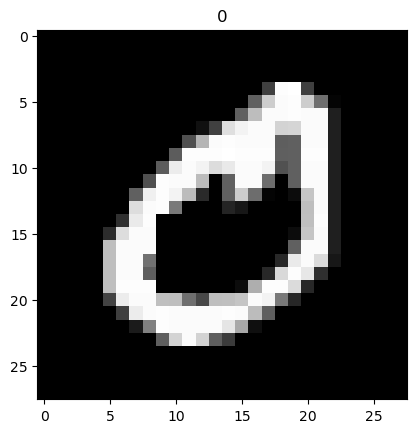

In [4]:
(x_trein, y_trein), (x_test, y_test) = mnist.load_data()
plt.imshow(x_trein[21], cmap='grey')
plt.title(y_trein[21])

In [6]:
x_trein = x_trein.reshape((len(x_trein), np.prod(x_trein.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
x_trein = x_trein.astype("float32")
x_test = x_test.astype("float32")

#normalizaçao
x_test/=255
x_trein/=255



In [8]:
y_trein = to_categorical(y_trein, 10)
y_test = to_categorical(y_test, 10)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [9]:
modelo = Sequential()
modelo.add(Dense(units=64, activation="relu", input_dim= 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation="relu"))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation="relu"))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=10, activation="softmax"))

modelo.summary()

/home/aluizioneto1918/anaconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1769738924.032832   50219 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1769738924.056174   50219 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
modelo.compile(optimizer="adam", loss="categorical_crossentropy",
               metrics=["accuracy"])
historico = modelo.fit(x_trein, y_trein, epochs=20,
                       validation_data=(x_test, y_test))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8658 - loss: 0.4394 - val_accuracy: 0.9404 - val_loss: 0.1978
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.9333 - loss: 0.2322 - val_accuracy: 0.9586 - val_loss: 0.1348
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.9429 - loss: 0.1929 - val_accuracy: 0.9636 - val_loss: 0.1227
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.9510 - loss: 0.1680 - val_accuracy: 0.9658 - val_loss: 0.1100
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.9549 - loss: 0.1531 - val_accuracy: 0.9684 - val_loss: 0.1088
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.9570 - loss: 0.1454 - val_accuracy: 0.9715 - val_loss: 0.0986
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.9599 - loss: 0.1344 - val_accuracy: 0.9688 - val_loss: 0.1029
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.9611 - l

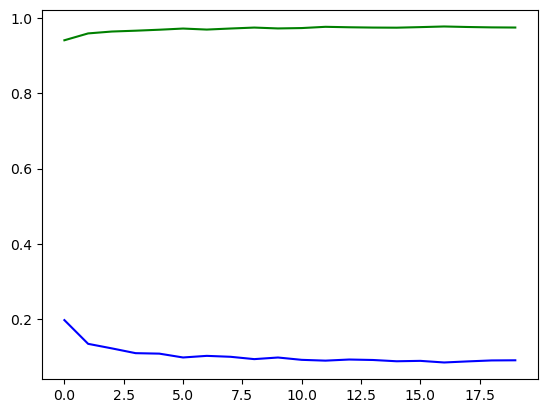

In [12]:
historico.history.keys()
plt.plot(historico.history["val_loss"], color="blue")
plt.plot(historico.history["val_accuracy"], color="green")

In [13]:
prev = modelo.predict(x_test)
prev

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step


array([[2.4186911e-11, 2.5270515e-08, 3.7963353e-05, ..., 9.9978065e-01,
        1.8775852e-10, 2.1760845e-05],
       [2.2234289e-10, 4.1043868e-06, 9.9998719e-01, ..., 1.2352077e-08,
        1.7019105e-09, 1.4406926e-12],
       [1.4354731e-12, 9.9999887e-01, 1.6368989e-09, ..., 3.2754130e-08,
        1.0549819e-06, 1.2178781e-11],
       ...,
       [4.3116863e-10, 3.9440881e-10, 6.6192108e-08, ..., 1.8880777e-07,
        9.0206420e-09, 7.1627828e-06],
       [1.9399564e-16, 2.0611202e-14, 1.8648631e-15, ..., 1.0547084e-15,
        1.3371233e-09, 1.0189823e-11],
       [8.6605697e-12, 6.2220423e-15, 3.5084457e-14, ..., 3.5172980e-17,
        1.1415599e-13, 3.0849021e-19]], dtype=float32)

In [14]:
y_test_matriz = [np.argmax(t) for t in y_test]
y_prev_matriz = [np.argmax(t) for t in prev]
confusao = confusion_matrix(y_test_matriz, y_prev_matriz)
confusao

array([[ 970,    0,    0,    1,    0,    1,    2,    0,    5,    1],
       [   0, 1125,    1,    0,    0,    0,    2,    1,    6,    0],
       [   4,    3, 1004,    6,    2,    0,    1,    4,    8,    0],
       [   1,    0,    5,  989,    0,    5,    0,    3,    4,    3],
       [   1,    0,    4,    0,  940,    0,    8,    3,    4,   22],
       [   2,    0,    0,    9,    1,  867,    4,    0,    7,    2],
       [  10,    3,    0,    1,    4,    4,  934,    0,    2,    0],
       [   1,    3,   13,    8,    0,    0,    0,  994,    3,    6],
       [   5,    1,    2,    2,    3,    5,    1,    3,  950,    2],
       [   3,    4,    0,    8,    5,    4,    0,    3,   13,  969]])

In [ ]:
y_trein[20] #4

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [16]:
novo = x_trein[20]
novo = np.expand_dims(novo, axis=0)
pred = modelo.predict(novo)
pred = [np.argmax(t) for t in pred]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[np.int64(4)]